In [1]:
# 텐서플로우의 기본적인 구성을 익힙니다.
import tensorflow as tf

In [2]:
# tf.constant: 말 그대로 상수입니다.
hello = tf.constant('Hello, TensorFlow!')
print(hello)

Tensor("Const:0", shape=(), dtype=string)


In [3]:
a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a, b)  # a + b 로도 쓸 수 있음
print(c)

Tensor("Add:0", shape=(), dtype=int32)


In [4]:
# 위에서 변수와 수식들을 정의했지만, 실행이 정의한 시점에서 실행되는 것은 아닙니다.
# 다음처럼 Session 객제와 run 메소드를 사용할 때 계산이 됩니다.
# 따라서 모델을 구성하는 것과, 실행하는 것을 분리하여 프로그램을 깔끔하게 작성할 수 있습니다.
# 그래프를 실행할 세션을 구성합니다.
sess = tf.Session()
# sess.run: 설정한 텐서 그래프(변수나 수식 등등)를 실행합니다.
print(sess.run(hello))
print(sess.run([a, b, c]))

b'Hello, TensorFlow!'
[10, 32, 42]


In [5]:
# 세션을 닫습니다.
sess.close()

## 플레이스홀더와 변수의 개념을 익혀봅니다

In [6]:
# tf.placeholder: 계산을 실행할 때 입력값을 받는 변수로 사용합니다.
# None 은 크기가 정해지지 않았음을 의미합니다.
X = tf.placeholder(tf.float32,[None,3])
print(X)

Tensor("Placeholder:0", shape=(?, 3), dtype=float32)


In [7]:
# X 플레이스홀더에 넣을 값 입니다.
# 플레이스홀더에서 설정한 것 처럼, 두번째 차원의 요소의 갯수는 3개 입니다.
x_data = [[1, 2, 3], [4, 5, 6]]

In [8]:
# tf.Variable:그래프를 계산하면서 최적화 할 변수들입니다. 이 값이 바로 신경망을 좌우하는 값들입니다.
# tf.random_normal:각 변수들의 초기값을 정규분포 랜덤값으로 초기화합니다.
W = tf.Variable(tf.random_normal([3,2]))
b = tf.Variable(tf.random_normal([2,1]))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# 입력값과 변수들을 계산할 수식을 작성합니다.
# tf.matmul처럼 mat*로 되어 있는 함수로 행렬 계산을 수행합니다.
expr = tf.matmul(X,W) + b

In [10]:
sess = tf.Session()
# 위에서 설정한 Variable 들의 값들을 초기화 하기 위해
# 처음에 tf.global_variables_initializer 를 한 번 실행해야 합니다.
sess.run(tf.global_variables_initializer())

print("=== x_data ===")
print(x_data)
print("=== W ===")
print(sess.run(W))
print("=== b ===")
print(sess.run(b))
print("=== expr ===")
# expr 수식에는 X 라는 입력값이 필요합니다.
# 따라서 expr 실행시에는 이 변수에 대한 실제 입력값을 다음처럼 넣어줘야합니다.
print(sess.run(expr, feed_dict={X: x_data}))

sess.close()

=== x_data ===
[[1, 2, 3], [4, 5, 6]]
=== W ===
[[-0.66322744 -2.3054585 ]
 [ 0.26017693  0.92784286]
 [-0.7922577   0.2714553 ]]
=== b ===
[[-1.854476 ]
 [ 0.5582989]]
=== expr ===
[[-4.3741226 -1.489883 ]
 [-5.547272  -2.395589 ]]


### X 와 Y 의 상관관계를 분석하는 기초적인 선형 회귀 모델을 만들고 실행해봅니다.

In [11]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

In [12]:
# name: 나중에 텐서보드등으로 값의 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 붙여줍니다.
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")
print(X)
print(Y)

Tensor("X:0", dtype=float32)
Tensor("Y:0", dtype=float32)


In [13]:
# X와 Y의 상관관계를 분석하기 위한 가설수식을 작성
# y = W * x + b
# W와 X가 행렬이 아니므로 tf.matmul이 아니라 기본곱셈기호를 사용
hypothesis = W * X + b

In [14]:
# 손실함수 작성
# mean(h-Y)^2 :예측값과 실제값의 거리를 비용(손실)함수로 정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 경사하강법 최적화를 수행
# 텐서플로우에게 학습도를 0.01로 준 경사 하강법 알고리즘을 실행한다.
# 학습률의 값이 너무 크거나 작으면 적합도가 좋은 곳을 찾아갈 수 없기 때문에 보통 이 학습률의 값을 조정해가면서
# 올바르게 학습이 진행되고 있는지 계속해서 확인하고 변경하게 된다
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# 비용을 최소화하는 것이 최종목표
train_op = optimizer.minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [15]:
# 세션을 생성하고 초기화
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # 최적화를 100번 수행합니다.
    for step in range(100):
        # sess.run 을 통해 train_op 와 cost 그래프를 계산합니다.
        # 이 때, 가설 수식에 넣어야 할 실제값을 feed_dict 을 통해 전달합니다.
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})

        print(step, cost_val, sess.run(W), sess.run(b))

    # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인해봅니다.
    print("\n=== Test ===")
    print("X: 5, Y:", sess.run(hypothesis, feed_dict={X: 5}))
    print("X: 2.5, Y:", sess.run(hypothesis, feed_dict={X: 2.5}))

0 16.95501 [1.1947577] [0.03183037]
1 0.20281924 [1.0002518] [-0.05243877]
2 0.0026973088 [1.0209923] [-0.04205173]
3 0.00029378754 [1.0182202] [-0.0420383]
4 0.0002526548 [1.0180299] [-0.04091872]
5 0.00024032628 [1.0175695] [-0.03994694]
6 0.00022890675 [1.01715] [-0.03898536]
7 0.00021803653 [1.0167375] [-0.03804832]
8 0.00020767807 [1.0163351] [-0.03713365]
9 0.00019781334 [1.0159425] [-0.03624097]
10 0.00018841517 [1.0155592] [-0.03536974]
11 0.00017946736 [1.0151851] [-0.03451948]
12 0.00017094181 [1.0148201] [-0.03368964]
13 0.0001628205 [1.0144639] [-0.03287974]
14 0.0001550871 [1.0141162] [-0.03208935]
15 0.00014772071 [1.0137768] [-0.03131795]
16 0.00014070373 [1.0134456] [-0.03056507]
17 0.00013402048 [1.0131224] [-0.0298303]
18 0.00012765378 [1.012807] [-0.02911322]
19 0.00012159106 [1.0124991] [-0.02841338]
20 0.000115815434 [1.0121986] [-0.02773035]
21 0.00011031365 [1.0119054] [-0.02706371]
22 0.00010507469 [1.0116192] [-0.02641314]
23 0.00010008336 [1.0113399] [-0.02577

## Classification

#### 털과 날개가 있는지 없는지에 따라, 포유류인지 조류인지 분류하는 신경망 모델을 만들어봅니다.

In [16]:
import tensorflow as tf
import numpy as np

In [18]:
# [털, 날개]
x_data = np.array([[0, 0], [1, 0], [1, 1], [0, 0], [0, 0], [0, 1]])

In [20]:
# [기타, 포유류, 조류]
# 다음과 같은 형식을 one-hot 형식의 데이터라고 합니다.
y_data = np.array([
    [1, 0, 0],  # 기타
    [0, 1, 0],  # 포유류
    [0, 0, 1],  # 조류
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1]
])

### 신경망 모델 구성

In [21]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [22]:
# 신경망은 2차원으로 [입력층(특성),출력층(레이블)] -> [2,3]으로 정합니다.
W = tf.Variable(tf.random_uniform([2,3],-1.,1.))

In [24]:
# 편향을 각각 각 레이어의 아웃풋 갯수로 설정
# 편향은 아웃풋의 갯수, 즉 최종결과값의 분류갯수인 3으로 설정
b = tf.Variable(tf.zeros([3]))

In [25]:
# 신경망에 가중치 W과 편향 b을 적용합니다
L = tf.add(tf.matmul(X, W), b)

In [26]:
# 가중치와 편향을 이용해 계산한 결과 값에
# 텐서플로우에서 기본적으로 제공하는 활성화 함수인 ReLU 함수를 적용합니다.
L = tf.nn.relu(L)

In [27]:
# 마지막으로 softmax함수를 이용하여 출력값을 사용하기 쉽게 만듭니다
# softmax함수는 다음처럼 결과값을 전체합이 1인 확률로 만들어주는 함수입니다.
# 예) [8.04, 2.76, -6.52] -> [0.53 0.24 0.23]
model = tf.nn.softmax(L)

In [28]:
# 신경망을 최적화하기 위한 비용함수를 작성합니다.
# 각 개별결과에 대한 합을 구한 뒤 평균을 내는 방식을 사용합니다.
# 전체합이 아닌, 개별결과를 구한 뒤 평균을 내는 방식을 사용하기 위해 axis옵션을 사용합니다.
# axis옵션이 없으면 -1.09처럼 총합인 스칼라값으로 출력됩니다.
#        Y         model         Y * tf.log(model)   reduce_sum(axis=1)
# 예) [[1 0 0]  [[0.1 0.7 0.2]  -> [[-1.0  0    0]  -> [-1.0, -0.09]
#     [0 1 0]]  [0.2 0.8 0.0]]     [ 0   -0.09 0]]
# 즉, 이것은 예측값과 실제값 사이의 확률 분포의 차이를 비용으로 계산한 것이며,
# 이것을 Cross-Entropy 라고 합니다.

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(model), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)

##  신경망 모델학습

In [29]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(100):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})

    if (step + 1) % 10 == 0:
        print(step + 1, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

10 1.21361
20 1.2069219
30 1.2004808
40 1.1942776
50 1.1883036
60 1.1825496
70 1.1770073
80 1.1716682
90 1.1665243
100 1.1615677


In [30]:
#########
# 결과 확인
# 0:기타 1:포유류, 2:조류
######
# tf.argmax: 예측값과 실제값의 행렬에서 tf.argmax를 이용해 가장 큰 값을 가져옵니다.
# 예) [[0 1 0] [1 0 0]] -> [1 0]
#    [[0.2 0.7 0.1] [0.9 0.1 0.]] -> [1 0]
prediction = tf.argmax(model, 1)
prediction

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [31]:
target = tf.argmax(Y, 1)
target

<tf.Tensor 'ArgMax_1:0' shape=<unknown> dtype=int64>

In [32]:
print('예측값:', sess.run(prediction, feed_dict={X: x_data}))
print('실제값:', sess.run(target, feed_dict={Y: y_data}))

예측값: [0 0 0 0 0 0]
실제값: [0 1 2 0 0 2]


In [34]:
is_correct = tf.equal(prediction, target)
is_correct

<tf.Tensor 'Equal_1:0' shape=<unknown> dtype=bool>

In [35]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
accuracy

<tf.Tensor 'Mean_2:0' shape=() dtype=float32>

In [36]:
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))

정확도: 50.00


## Word2Vec

In [104]:
# Word2Vec 모델을 간단하게 구현해봅니다.
import tensorflow as tf
import numpy as np

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [105]:
# matplot에서 한글을 표시하기 위한 설정
font_name = matplotlib.font_manager.FontProperties(
                fname='C:/ProgramData/Anaconda3/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'  # 한글 폰트 위치를 넣어주세요
            ).get_name()
matplotlib.rc('font',family=font_name)

In [106]:
# 단어 벡터를 분석해볼 임의의 문장들
sentences = ["나 고양이 좋다",
             "나 강아지 좋다",
             "나 동물 좋다",
             "강아지 고양이 동물",
             "여자친구 고양이 강아지 좋다",
             "고양이 생선 우유 좋다",
             "강아지 생선 싫다 우유 좋다",
             "강아지 고양이 눈 좋다",
             "나 여자친구 좋다",
             "여자친구 나 싫다",
             "여자친구 나 영화 책 음악 좋다",
             "나 게임 만화 애니 좋다",
             "고양이 강아지 싫다",
             "강아지 고양이 좋다"]

In [107]:
# 문장을 전부 합친 후 공백으로 단어들을 나누고 고유한 단어들로 리스트를 만듭니다.
word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))

In [108]:
# 문자열로 분석하는 것 보다, 숫자로 분석하는 것이 훨씬 용이하므로
# 리스트에서 문자들의 인덱스를 뽑아서 사용하기 위해,
# 이를 표현하기 위한 연관 배열과, 단어 리스트에서 단어를 참조 할 수 있는 인덱스 배열을 만듭합니다.
word_dict = {w: i for i, w in enumerate(word_list)}

In [109]:
# 윈도우 사이즈를 1로 하는 skip-gram 모델을 만듭니다.
# 예) 나 게임 만화 애니 좋다
#   -> ([나, 만화], 게임), ([게임, 애니], 만화), ([만화, 좋다], 애니)
#   -> (게임, 나), (게임, 만화), (만화, 게임), (만화, 애니), (애니, 만화), (애니, 좋다)
skip_grams = []

for i in range(1, len(word_sequence) - 1):
    # (context, target) : ([target index - 1, target index + 1], target)
    # 스킵그램을 만든 후, 저장은 단어의 고유 번호(index)로 저장합니다
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

    # (target, context[0]), (target, context[1])..
    for w in context:
        skip_grams.append([target, w])

In [110]:
# skip-gram 데이터에서 무작위로 데이터를 뽑아 입력값과 출력값의 배치 데이터를 생성하는 함수
def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        random_inputs.append(data[i][0])  # target
        random_labels.append([data[i][1]])  # context word

    return random_inputs, random_labels

In [111]:
#########
# 옵션 설정
######
# 학습을 반복할 횟수
training_epoch = 300
# 학습률
learning_rate = 0.1
# 한 번에 학습할 데이터의 크기
batch_size = 20
# 단어 벡터를 구성할 임베딩 차원의 크기
# 이 예제에서는 x, y 그래프로 표현하기 쉽게 2 개의 값만 출력하도록 합니다.
embedding_size = 2
# word2vec 모델을 학습시키기 위한 nce_loss 함수에서 사용하기 위한 샘플링 크기
# batch_size 보다 작아야 합니다.
num_sampled = 15
# 총 단어 갯수
voc_size = len(word_list)

In [112]:
#########
# 신경망 모델 구성
######
inputs = tf.placeholder(tf.int32, shape=[batch_size])

In [113]:
# tf.nn.nce_loss 를 사용하려면 출력값을 이렇게 [batch_size, 1] 구성해야합니다.
labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

In [114]:
# word2vec 모델의 결과 값인 임베딩 벡터를 저장할 변수입니다.
# 총 단어 갯수와 임베딩 갯수를 크기로 하는 두 개의 차원을 갖습니다.
embeddings = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))

In [115]:
# 임베딩 벡터의 차원에서 학습할 입력값에 대한 행들을 뽑아옵니다.
# 예) embeddings     inputs    selected
#    [[1, 2, 3]  -> [2, 3] -> [[2, 3, 4]
#     [2, 3, 4]                [3, 4, 5]]
#     [3, 4, 5]
#     [4, 5, 6]]
selected_embed = tf.nn.embedding_lookup(embeddings, inputs)

In [116]:
# nce_loss 함수에서 사용할 변수들을 정의합니다.
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

In [117]:
# nce_loss 함수를 직접 구현하려면 매우 복잡하지만,
# 함수를 텐서플로우가 제공하므로 그냥 tf.nn.nce_loss 함수를 사용하기만 하면 됩니다.
loss = tf.reduce_mean(
            tf.nn.nce_loss(nce_weights, nce_biases, labels, selected_embed, num_sampled, voc_size))

train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [118]:
#########
# 신경망 모델 학습
######
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    for step in range(1, training_epoch + 1):
        batch_inputs, batch_labels = random_batch(skip_grams, batch_size)

        _, loss_val = sess.run([train_op, loss],
                               feed_dict={inputs: batch_inputs,
                                          labels: batch_labels})

        if step % 10 == 0:
            print("loss at step ", step, ": ", loss_val)

    # matplot 으로 출력하여 시각적으로 확인해보기 위해
    # 임베딩 벡터의 결과 값을 계산하여 저장합니다.
    # with 구문 안에서는 sess.run 대신 간단히 eval() 함수를 사용할 수 있습니다.
    trained_embeddings = embeddings.eval()

loss at step  10 :  5.919656
loss at step  20 :  3.9946074
loss at step  30 :  3.3942344
loss at step  40 :  3.4237072
loss at step  50 :  3.2209
loss at step  60 :  3.162049
loss at step  70 :  3.1379917
loss at step  80 :  3.2183833
loss at step  90 :  3.0083623
loss at step  100 :  3.1489146
loss at step  110 :  3.5853043
loss at step  120 :  3.2198384
loss at step  130 :  3.3655007
loss at step  140 :  3.065447
loss at step  150 :  2.967588
loss at step  160 :  3.3667789
loss at step  170 :  3.291223
loss at step  180 :  2.9558861
loss at step  190 :  2.8711343
loss at step  200 :  3.2538018
loss at step  210 :  3.3301873
loss at step  220 :  3.408256
loss at step  230 :  2.9807675
loss at step  240 :  3.3608787
loss at step  250 :  3.1943593
loss at step  260 :  2.8957705
loss at step  270 :  3.0340564
loss at step  280 :  2.7595305
loss at step  290 :  2.9654286
loss at step  300 :  3.238135


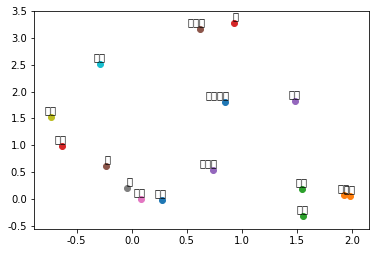

In [119]:
#########
# 임베딩된 Word2Vec 결과 확인
# 결과는 해당 단어들이 얼마나 다른 단어와 인접해 있는지를 보여줍니다.
######

for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.show()